# **Title of Project**

##**Servo Prediction**

-------------

## **Objective**

This data set is from a simulation of a servo system
involving a servo amplifier, a motor, a lead screw/nut, and a sliding carriage of some sort. It may have been on of the translational axes of a
robot on the 9th floor of the Al lab. In any case, the output value is almost certainly a rise time, or the time required for the system to respond to
a step change in a position set point.

## **Data Source**

##**Github**

## **Import Library**

In [2]:
import pandas as pd
import numpy as np

## **Import Data**

In [4]:
servo = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Servo%20Mechanism.csv')
servo.replace({ 'Motor': {'A' :0, 'B' :1, 'C':2, 'D' : 3, 'E' :4}},inplace=True)
servo.replace({'Screw': {'A':0, 'B':1, 'C':2, 'D' : 3, 'E' :4}},inplace=True)
servo.head()

,Motor,Screw,Pgain,Vgain,Class
0,4,4,5,4,4
1,1,3,6,5,11
2,3,3,4,3,6
3,1,0,3,2,48
4,3,1,6,5,6


## **Describe Data**

In [5]:
servo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Motor   167 non-null    int64
 1   Screw   167 non-null    int64
 2   Pgain   167 non-null    int64
 3   Vgain   167 non-null    int64
 4   Class   167 non-null    int64
dtypes: int64(5)
memory usage: 6.6 KB


In [6]:
servo.describe()

,Motor,Screw,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000,167.000000,167.000000
mean,1.880240,1.814371,4.155689,2.538922,21.173653
std,1.413372,1.437965,1.017770,1.369850,13.908038
min,0.000000,0.000000,3.000000,1.000000,1.000000
25%,1.000000,0.500000,3.000000,1.000000,10.500000
50%,2.000000,2.000000,4.000000,2.000000,18.000000
75%,3.000000,3.000000,5.000000,4.000000,33.500000
max,4.000000,4.000000,6.000000,5.000000,51.000000


## **Data Visualization**

<Figure size 1600x1200 with 0 Axes>

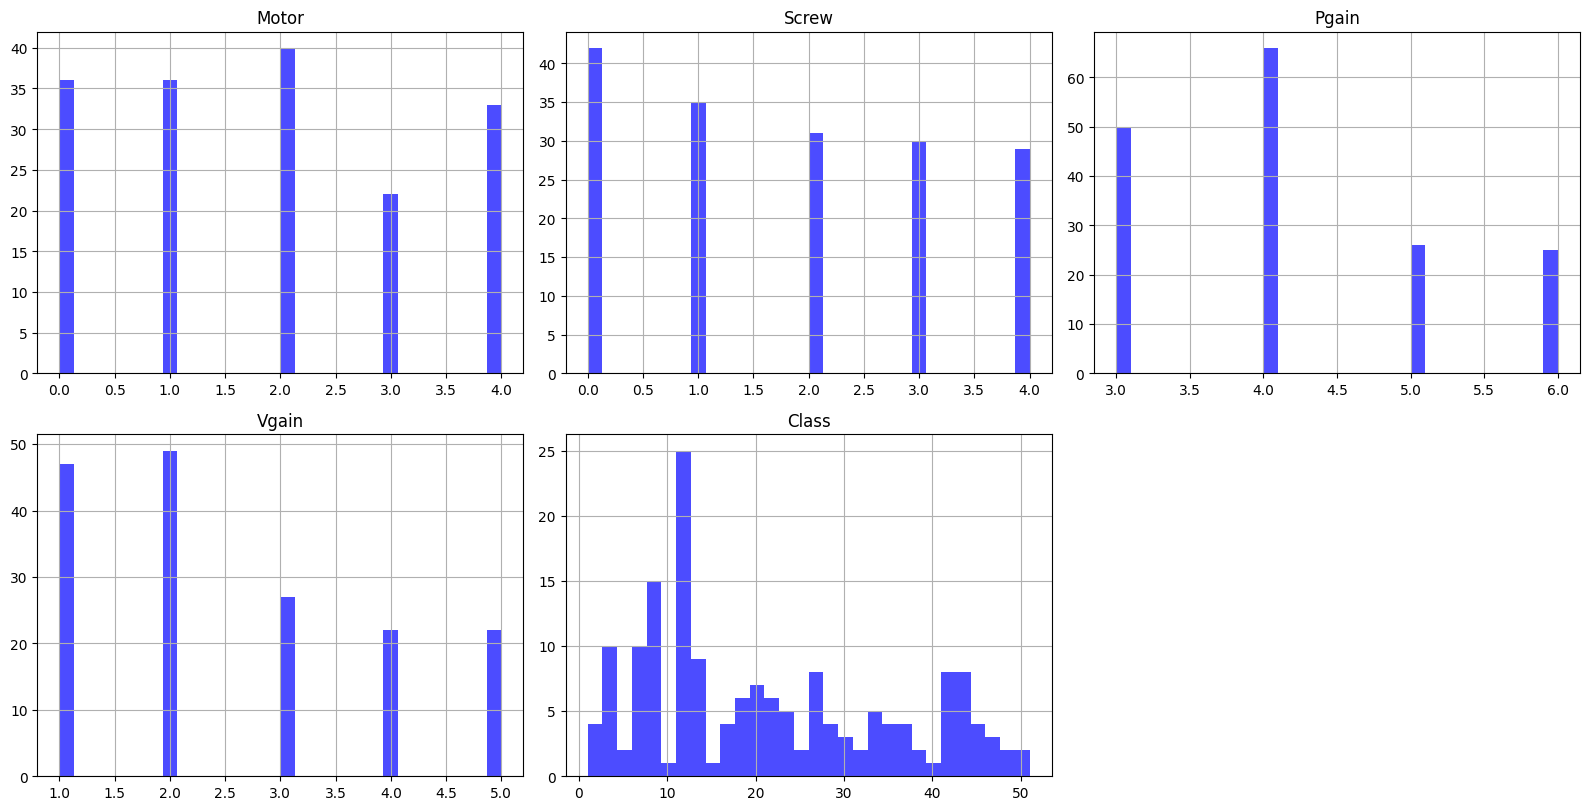

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plots
plt.figure(figsize=(16, 12))

# Plot histograms for each feature
servo.hist(bins=30, figsize=(16, 12), layout=(3, 3), color='blue', alpha=0.7)
plt.tight_layout()
plt.show()

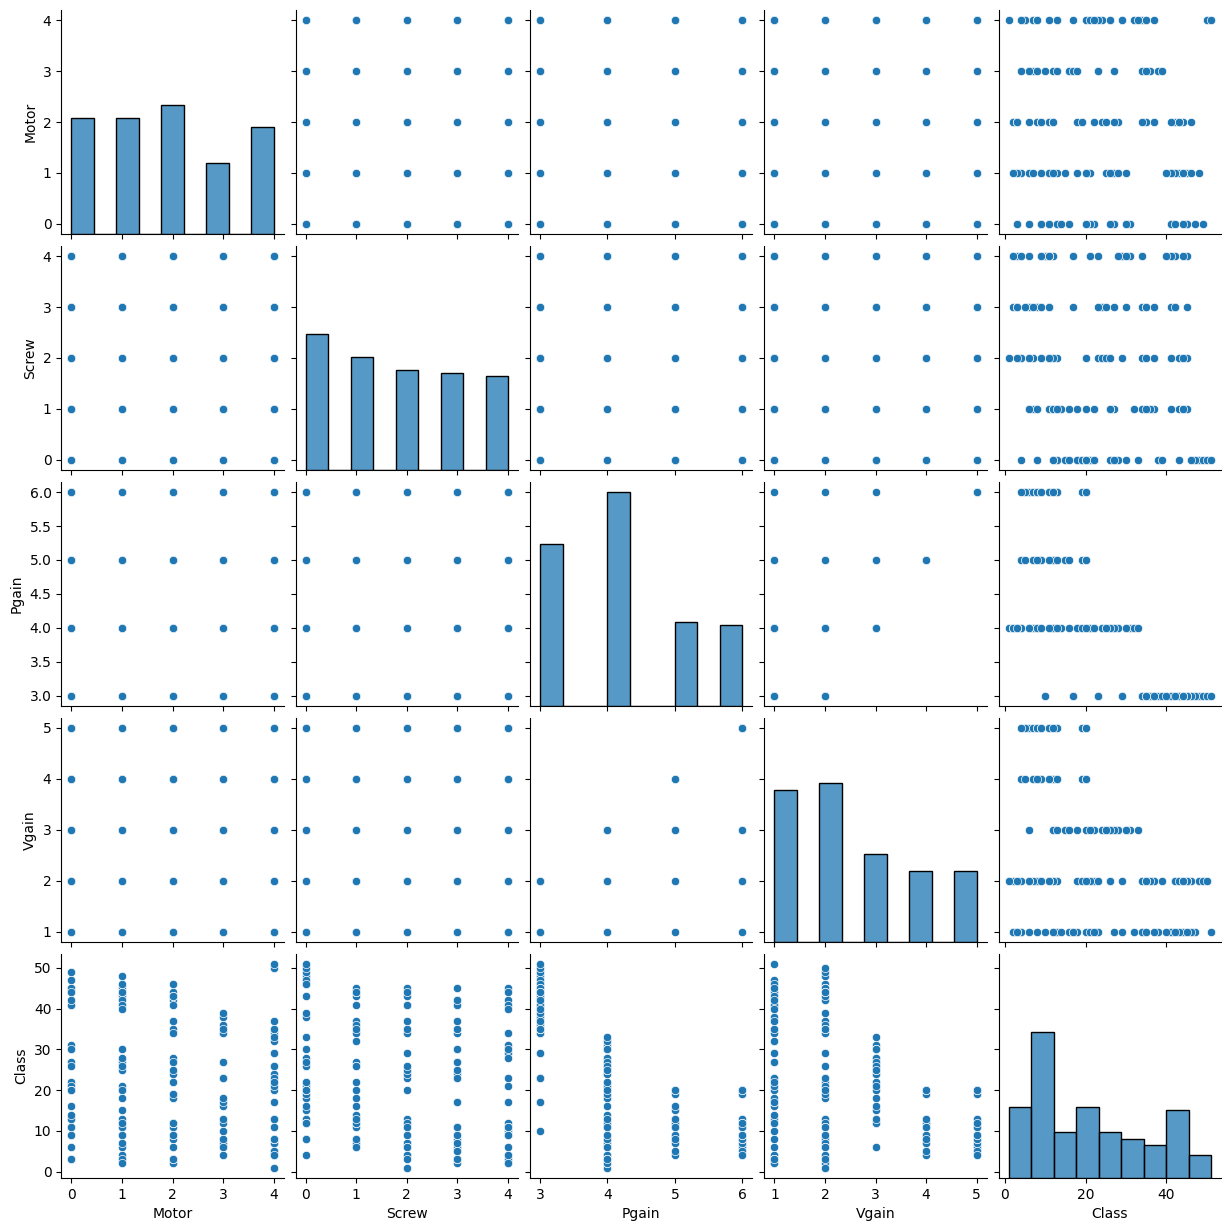

In [8]:
sns.pairplot(servo)
plt.show()


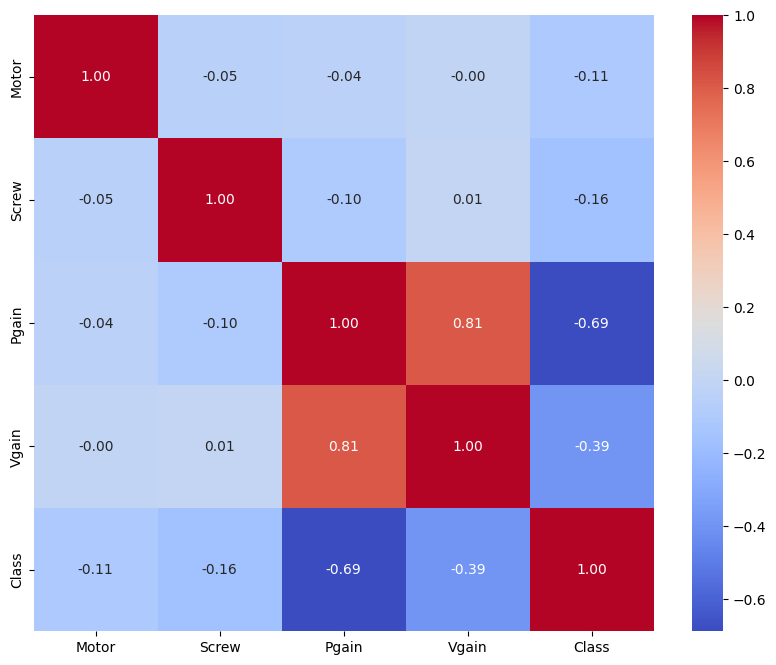

In [9]:
# Convert columns with 'E', 'B', and 'D' to numeric values, handling errors
for col in servo.columns:
    try:
        servo[col] = pd.to_numeric(servo[col])
    except ValueError:
        # Handle the error, for example, by replacing 'E', 'B', and 'D' with NaN
        servo[col] = servo[col].replace({'E': np.nan, 'B': np.nan, 'D': np.nan, 'A': np.nan, 'C': np.nan}).astype(float) # Replace 'E', 'B', and 'D' with np.nan

plt.figure(figsize=(10, 8))
sns.heatmap(servo.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

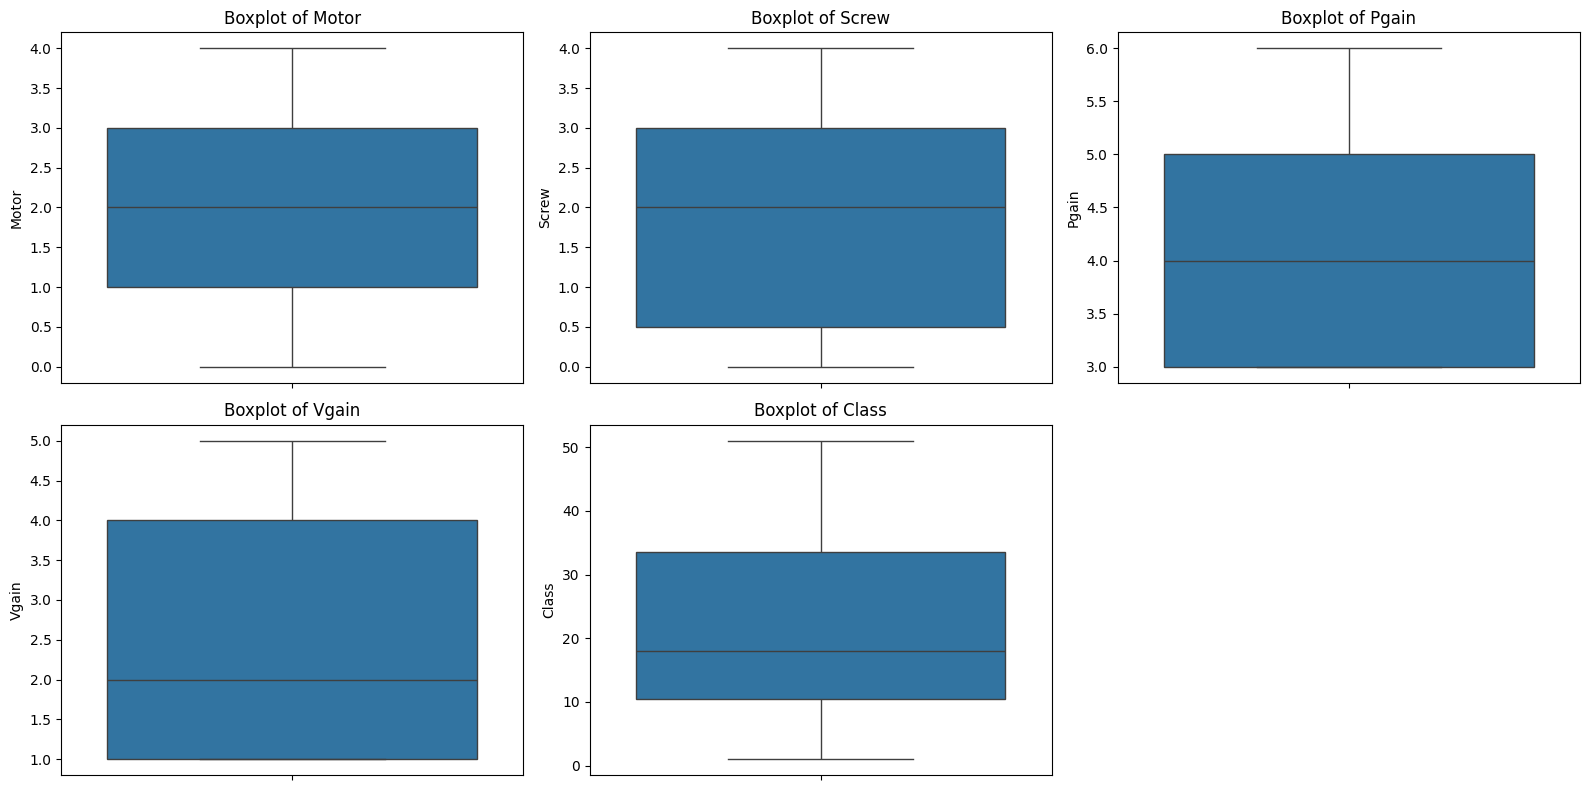

In [10]:
plt.figure(figsize=(16, 8))

# Plot boxplots for each feature
for i, column in enumerate(servo.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=servo[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

## **Data Preprocessing**

In [11]:
# Check for missing values
missing_values = servo.isnull().sum()
print(missing_values)

# Option 1: Drop rows with missing values
df = servo.dropna()

# Option 2: Fill missing values (e.g., with mean, median, or mode)
df = servo.fillna(df.mean())  # For numerical columns
# df['column_name'].fillna(df['column_name'].mode()[0], inplace=True)  # For categorical columns

Motor    0
Screw    0
Pgain    0
Vgain    0
Class    0
dtype: int64


## **Define Target Variable (y) and Feature Variables (X)**

In [13]:
y = df['Class']
X = df[['Motor', 'Screw', 'Pgain', 'Vgain']]

## **Train Test Split**

In [14]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Modeling**

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)



##**Prediction**

In [20]:
# Predict on the test set
y_pred = model.predict(X_test)

## **Model Evaluation**

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# For regression tasks
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R^2: {r2:.2f}')

MSE: 59.24
MAE: 4.82
R^2: 0.75


## **Explaination**